# TP1

### Requisitos:

- Usar a package criptography
- Usar o package asyncio para criar comunicações cliente-servidor
- Usar o SHAKE-256 como cifra AEAD em modo XOFHash

### O que é o "Modelo Sponge"

> O modelo Sponge surge dada a dificuldade de construir uma boa função de compressão unidirecional, assim, este substitui a compressão por uma permutação.
> O SHA3 introduz esta ideia através do uso do uso do sponge model

Em relação ao modelo MD:
- Permutações são mais simples de contruir e mais eficientes que compressões
- O output da função de "hash" é fixo mas esse tamanho é um parametro da operação, ou seja, pode variar entre duas execuções do mesmo "hash"


Esta ultima caracteristica dá a designação de XOF(“eXtendable Output Function”) à função de hash

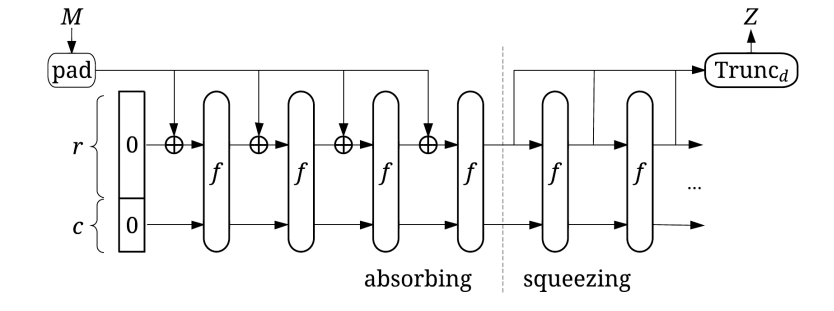

O nome Sponge provém da computação ser feita em duas fases:

- **Absorb** :
    - M é padded e dividida em segmentos de tamanho r (rate);
    - O plaintext $ P ≡ p0 ∥p1 ∥ … ∥pm $ é absorvido num bloco de estado com tamanho b >> r;
    - O resto do bloco, de tamanho $ c = b - r $ , designa-se por capacidade (metade dos bits da capacidade é o coeficiente de segurança desta arquitetura);
    - O bloco de estados é inicializado com um vetor vi nas primeiras r posições e zeros na capacidade;
    - Em cada iteração é lido um bloco do "plaintext" que é somado aos primeiros r bits do estados e aplica-se então uma permutação $ f: {{0,1}}^b → {{0, 1}}^b $ à totalidade do estado.
<div class="alert alert-block alert-info">
<b>Tip:</b> Coeficiente de Segurança é diferença entre a complexidade de um ataque teórico e a segurança oferecida por um sistema criptográfico.
</div>

- **Squeeze**
    - Através do estado construída na fase de Absorb,são extraídos segmentos $ ti $ do "output" e ao mesmo tempo o estado continua a ser transformado com $ f $;
    - A cada extração são retirados r bits do estado;
    - Concatenando todos os segmentos $ ti $ constroi-se a tag
    - Para determinar o parametro $ ℓ $ faz-se $ ℓ = ⌈ ∣tag∣/r⌉ $
    - $ f $ define o algoritmo **Keccaq** , que usa $ b = 1600 bits $
    - Como vamos usar **SHAKE-256** as propriedades são as seguintes:
        - output: variável
        - rate: 1088
        - capacity: 515
        - 1st pre-image security: 256

### Cifra AEAD usando o modelo “sponge”

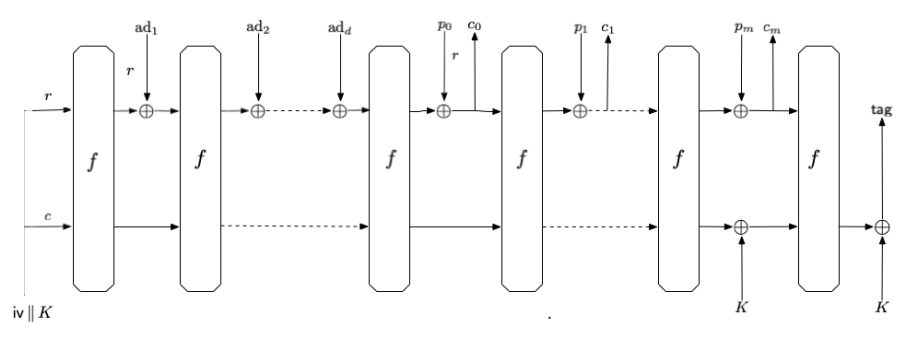

Como vemos pela imagem, o modelo Sponge pode ser usado como *cifra autenticada com dados associados*
- Na primeira fase são absorvidos os segmentos que descrevem os dados associados;
- Na segunda fase usa-se uma cifra de Vernam que recebe $pi$ sucessivos de um "plaintext", soma-os com r bits do estado e devolve os segmentos ci do criptograma;
- Após todo o processamento do plaintext, existe uma permutação para construir a tag de autenticação final
- A chave $ K $ da cifra aparece na inicialização do 1º valor do estados e aparece antes e depois da ultima aplicação da permutação